# Data Manipulation with Python - Titanic Project

![Some text here](https://www.encyclopedia-titanica.org/images/titanic-fp-southampton-banner1.jpg)

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City.

Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time one of the deadliest of a single ship and the deadliest peacetime sinking of a superliner or cruise ship to date.

We will work with real data from the first -and last- voyge of the Titanic, to discover what really happened to the people who sailed on RMS Titanic.

For this project, you should work with your team for some time, then we will share the results with the class.

You can find some more info about the people who sailed on the Titanic here:

https://www.encyclopedia-titanica.org/

Also, the Titanic data is one of the introductory competitions of Kaggle. If you feel like trying to participate you can find the data description below:

https://www.kaggle.com/c/titanic/data

## First things first - show me the data

The data we will work with comprises of information about all the people who sailed with titanic. It is given as a single comma separated values file.

In [9]:
import pandas as pd
titanic = pd.read_csv("TitanicData.csv")

Let's see what we loaded

In [12]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Note that some values are null. We might need to deal with this at some point. Some columns are categorical / string etc (see the "object" ones).

## Exploration

In [17]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


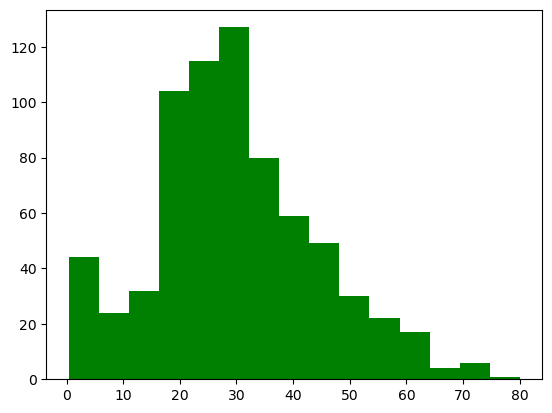

<Axes: ylabel='Frequency'>

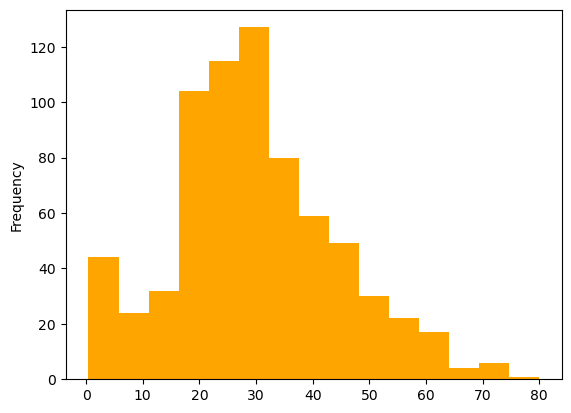

In [20]:
import matplotlib.pyplot as plt

titanicValidAge = titanic[titanic["Age"].notna()]

plt.hist(titanicValidAge["Age"], bins = 15, color = 'green')
plt.show()

titanic["Age"].plot.hist(bins = 15, color = "orange")

Fare at the 75% Percentile:  31.0


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

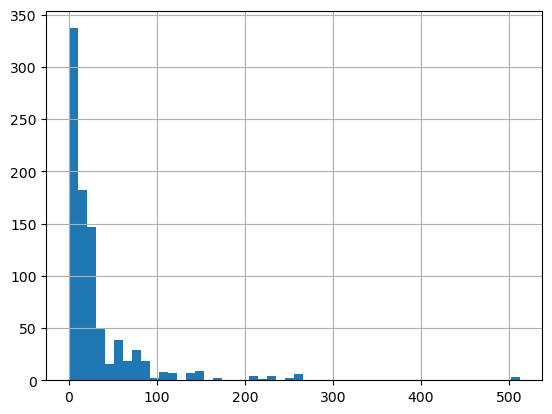

In [23]:
titanic["Fare"].hist(bins = 50)
FareAt75 = titanic["Fare"].quantile(0.75)
print("Fare at the 75% Percentile: ", FareAt75)

titanic["Fare"].describe()

## Surviving the Titanic

In [25]:
richFare = 100

richPeople = titanic[(titanic["Fare"] >= richFare)]

howManyRich = len(richPeople) 
howManyRichSurvived = sum(richPeople["Survived"]) 
print("Percentage of rich people survived: ", howManyRichSurvived/howManyRich)


poorPeople = titanic[(titanic["Fare"] < richFare)]

howManyPoor = len(poorPeople)
howManyPoorSurvived = sum(poorPeople["Survived"])
print("Percentage of poor people survived: ", howManyPoorSurvived/howManyPoor)

Percentage of rich people survived:  0.7358490566037735
Percentage of poor people survived:  0.3615751789976134


In [28]:
def probSurvival(maxFarePaid):
    paidBelowFare = titanic[(titanic["Fare"] <= maxFarePaid)]

    howMany = len(paidBelowFare)
    howManySurvived = sum(paidBelowFare["Survived"])
    return  howManySurvived/howMany

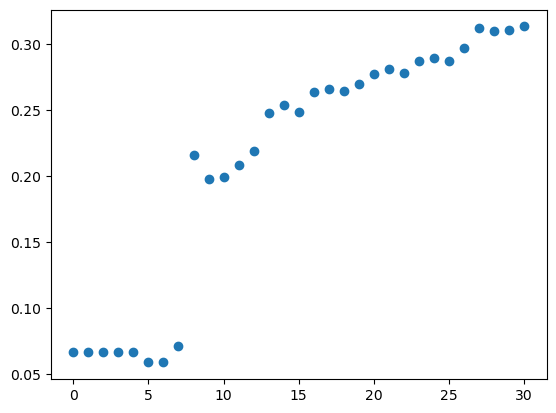

In [30]:
import numpy as np

fareRange = np.arange(titanic["Fare"].min(), titanic["Fare"].quantile(0.75))

survived = [probSurvival(fare) for fare in fareRange]

plt.plot(fareRange, survived, "o")

---

*Interpretation*

It seems like there are two distinctly different domains in this plot. People who paid less that ~8 USD had practically no chance of survival - they might be specific holders of 3rd class tickets with no access to the saving boats. No matter the reason, it seems they did not even consider them. From then onwards, there seems to be a correlation between the fare paid and the chance of being rescued. The relation seems linear.

---

## How much would it have cost me to travel first class?

In [34]:
titanic["FareToday"] = titanic["Fare"] * 109.53
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareToday
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,794.092500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,7807.659849
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,868.025250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5816.043000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,881.716500


In [36]:
titanic.groupby("Pclass")["FareToday"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,9217.462922,8585.002216,0.0,3387.100244,6603.289875,10241.055,56115.417276
2,184.0,2263.128921,1469.607686,0.0,1423.890000,1560.802500,2847.780,8050.455000
3,491.0,1497.883003,1290.059861,0.0,848.857500,881.716500,1697.715,7617.811500


In [39]:
titanic[titanic["Fare"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareToday
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,0.0
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,0.0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,0.0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,0.0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,0.0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,0.0
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,0.0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,0.0
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,0.0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,0.0


In [43]:
titanic[titanic["Fare"] != 0].groupby("Pclass")["FareToday"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,211.0,9435.886214,8566.577329,547.650000,3604.676112,6788.581776,10948.892625,56115.417276
2,178.0,2339.414165,1432.999462,1150.065000,1423.890000,1645.458237,2847.780000,8050.455000
3,487.0,1510.185943,1288.151410,439.489125,848.857500,881.716500,1697.715000,7617.811500
